## Predicting Wine Quality

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy 
from scipy.stats.stats import pearsonr

pd.options.display.float_format = '{:,.4f}'.format

wineWhite = pd.read_csv('./processeddata/wine_quality_white.csv', skipinitialspace=True, index_col=0)
wineRed = pd.read_csv('./processeddata/wine_quality_red.csv', skipinitialspace=True, index_col=0)

### Data Preprocessing

In [3]:
wineWhite.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,7.0000,0.2700,0.3600,20.7000,0.0450,45.0000,170.0000,1.0010,3.0000,0.4500,8.8000,6
2,6.3000,0.3000,0.3400,1.6000,0.0490,14.0000,132.0000,0.9940,3.3000,0.4900,9.5000,6
3,8.1000,0.2800,0.4000,6.9000,0.0500,30.0000,97.0000,0.9951,3.2600,0.4400,10.1000,6
4,7.2000,0.2300,0.3200,8.5000,0.0580,47.0000,186.0000,0.9956,3.1900,0.4000,9.9000,6
5,7.2000,0.2300,0.3200,8.5000,0.0580,47.0000,186.0000,0.9956,3.1900,0.4000,9.9000,6


In [4]:
wineWhite.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4894,6.2000,0.2100,0.2900,1.6000,0.0390,24.0000,92.0000,0.9911,3.2700,0.5000,11.2000,6
4895,6.6000,0.3200,0.3600,8.0000,0.0470,57.0000,168.0000,0.9949,3.1500,0.4600,9.6000,5
4896,6.5000,0.2400,0.1900,1.2000,0.0410,30.0000,111.0000,0.9925,2.9900,0.4600,9.4000,6
4897,5.5000,0.2900,0.3000,1.1000,0.0220,20.0000,110.0000,0.9887,3.3400,0.3800,12.8000,7
4898,6.0000,0.2100,0.3800,0.8000,0.0200,22.0000,98.0000,0.9894,3.2600,0.3200,11.8000,6


In [5]:
wineRed.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,7.4000,0.7000,0.0000,1.9000,0.0760,11.0000,34.0000,0.9978,3.5100,0.5600,9.4000,5
2,7.8000,0.8800,0.0000,2.6000,0.0980,25.0000,67.0000,0.9968,3.2000,0.6800,9.8000,5
3,7.8000,0.7600,0.0400,2.3000,0.0920,15.0000,54.0000,0.9970,3.2600,0.6500,9.8000,5
4,11.2000,0.2800,0.5600,1.9000,0.0750,17.0000,60.0000,0.9980,3.1600,0.5800,9.8000,6
5,7.4000,0.7000,0.0000,1.9000,0.0760,11.0000,34.0000,0.9978,3.5100,0.5600,9.4000,5


In [6]:
wineRed.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1595,6.2000,0.6000,0.0800,2.0000,0.0900,32.0000,44.0000,0.9949,3.4500,0.5800,10.5000,5
1596,5.9000,0.5500,0.1000,2.2000,0.0620,39.0000,51.0000,0.9951,3.5200,0.7600,11.2000,6
1597,6.3000,0.5100,0.1300,2.3000,0.0760,29.0000,40.0000,0.9957,3.4200,0.7500,11.0000,6
1598,5.9000,0.6450,0.1200,2.0000,0.0750,32.0000,44.0000,0.9955,3.5700,0.7100,10.2000,5
1599,6.0000,0.3100,0.4700,3.6000,0.0670,18.0000,42.0000,0.9955,3.3900,0.6600,11.0000,6


### Shape

In [7]:
wineWhite.shape

(4898, 12)

In [8]:
wineRed.shape

(1599, 12)

### Central Tendency and Dispersion

In [9]:
wineWhite.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,"4,898.0000","4,898.0000","4,898.0000","4,898.0000","4,898.0000","4,898.0000","4,898.0000","4,898.0000","4,898.0000","4,898.0000","4,898.0000","4,898.0000"
mean,6.8548,0.2782,0.3342,6.3914,0.0458,35.3081,138.3607,0.9940,3.1883,0.4898,10.5143,5.8779
std,0.8439,0.1008,0.1210,5.0721,0.0218,17.0071,42.4981,0.0030,0.1510,0.1141,1.2306,0.8856
min,3.8000,0.0800,0.0000,0.6000,0.0090,2.0000,9.0000,0.9871,2.7200,0.2200,8.0000,3.0000
25%,6.3000,0.2100,0.2700,1.7000,0.0360,23.0000,108.0000,0.9917,3.0900,0.4100,9.5000,5.0000
50%,6.8000,0.2600,0.3200,5.2000,0.0430,34.0000,134.0000,0.9937,3.1800,0.4700,10.4000,6.0000
75%,7.3000,0.3200,0.3900,9.9000,0.0500,46.0000,167.0000,0.9961,3.2800,0.5500,11.4000,6.0000
max,14.2000,1.1000,1.6600,65.8000,0.3460,289.0000,440.0000,1.0390,3.8200,1.0800,14.2000,9.0000


In [10]:
wineRed.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,"1,599.0000","1,599.0000","1,599.0000","1,599.0000","1,599.0000","1,599.0000","1,599.0000","1,599.0000","1,599.0000","1,599.0000","1,599.0000","1,599.0000"
mean,8.3196,0.5278,0.2710,2.5388,0.0875,15.8749,46.4678,0.9967,3.3111,0.6581,10.4230,5.6360
std,1.7411,0.1791,0.1948,1.4099,0.0471,10.4602,32.8953,0.0019,0.1544,0.1695,1.0657,0.8076
min,4.6000,0.1200,0.0000,0.9000,0.0120,1.0000,6.0000,0.9901,2.7400,0.3300,8.4000,3.0000
25%,7.1000,0.3900,0.0900,1.9000,0.0700,7.0000,22.0000,0.9956,3.2100,0.5500,9.5000,5.0000
50%,7.9000,0.5200,0.2600,2.2000,0.0790,14.0000,38.0000,0.9968,3.3100,0.6200,10.2000,6.0000
75%,9.2000,0.6400,0.4200,2.6000,0.0900,21.0000,62.0000,0.9978,3.4000,0.7300,11.1000,6.0000
max,15.9000,1.5800,1.0000,15.5000,0.6110,72.0000,289.0000,1.0037,4.0100,2.0000,14.9000,8.0000


### Replace invalid data with NaN

In [11]:
#wineRed['fixed acidity'] = wineRed['fixed acidity'].mask(wineRed['fixed acidity'] > 14, np.NaN)
wineRed['fixed acidity'] = wineRed['fixed acidity'].mask(wineRed['fixed acidity'] < 0, np.NaN)

In [12]:
#wineWhite['fixed acidity'] = wineWhite['fixed acidity'].mask(wineWhite['fixed acidity'] > 14, np.NaN)
wineWhite['fixed acidity'] = wineWhite['fixed acidity'].mask(wineWhite['fixed acidity'] < 0, np.NaN)

In [13]:
wineRed['volatile acidity'] = wineRed['volatile acidity'].mask(wineRed['volatile acidity'] < 0, np.NaN)
wineWhite['volatile acidity'] = wineWhite['volatile acidity'].mask(wineWhite['volatile acidity'] < 0, np.NaN)

In [14]:
wineRed['citric acid'] = wineRed['citric acid'].mask(wineRed['citric acid'] < 0, np.NaN)
wineWhite['citric acid'] = wineWhite['citric acid'].mask(wineWhite['citric acid'] < 0, np.NaN)

In [15]:
wineRed['residual sugar'] = wineRed['residual sugar'].mask(wineRed['residual sugar'] < 0, np.NaN)
wineWhite['residual sugar'] = wineWhite['residual sugar'].mask(wineWhite['residual sugar'] < 0, np.NaN)

In [16]:
wineRed['chlorides'] = wineRed['chlorides'].mask(wineRed['chlorides'] < 0, np.NaN)
wineWhite['chlorides'] = wineWhite['chlorides'].mask(wineWhite['chlorides'] < 0, np.NaN)

In [17]:
wineRed['free sulfur dioxide'] = wineRed['free sulfur dioxide'].mask(wineRed['free sulfur dioxide'] < 0, np.NaN)
wineWhite['free sulfur dioxide'] = wineWhite['free sulfur dioxide'].mask(wineWhite['free sulfur dioxide'] < 0, np.NaN)

In [18]:
wineRed['total sulfur dioxide'] = wineRed['total sulfur dioxide'].mask(wineRed['total sulfur dioxide'] < 0, np.NaN)
wineWhite['total sulfur dioxide'] = wineWhite['total sulfur dioxide'].mask(wineWhite['total sulfur dioxide'] < 0, np.NaN)

In [19]:
wineRed['density'] = wineRed['density'].mask(wineRed['density'] < 0, np.NaN)
wineWhite['density'] = wineWhite['density'].mask(wineWhite['density'] < 0, np.NaN)

In [20]:
wineRed['pH'] = wineRed['pH'].mask(wineRed['pH'] < 0, np.NaN)
wineWhite['pH'] = wineWhite['pH'].mask(wineWhite['pH'] < 0, np.NaN)

In [21]:
wineRed['sulphates'] = wineRed['sulphates'].mask(wineRed['sulphates'] < 0, np.NaN)
wineWhite['sulphates'] = wineWhite['sulphates'].mask(wineWhite['sulphates'] < 0, np.NaN)

In [22]:
wineRed['alcohol'] = wineRed['alcohol'].mask(wineRed['alcohol'] < 0, np.NaN)
wineWhite['alcohol'] = wineWhite['alcohol'].mask(wineWhite['alcohol'] < 0, np.NaN)

In [23]:
wineRed['quality'] = wineRed['quality'].mask(wineRed['quality'] < 0, np.NaN)
wineWhite['quality'] = wineWhite['quality'].mask(wineWhite['quality'] < 0, np.NaN)

### Analizing Missing Values

In [24]:
wineRed.isnull().values.any()

False

In [25]:
wineWhite.isnull().values.any()

False

### Classifify quality into (High, Medium, Low)

In [26]:
wineRed["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [27]:
wineRed['Categorical Quality'] = wineRed['quality']

In [28]:
wineRed

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Categorical Quality
1,7.4000,0.7000,0.0000,1.9000,0.0760,11.0000,34.0000,0.9978,3.5100,0.5600,9.4000,5,5
2,7.8000,0.8800,0.0000,2.6000,0.0980,25.0000,67.0000,0.9968,3.2000,0.6800,9.8000,5,5
3,7.8000,0.7600,0.0400,2.3000,0.0920,15.0000,54.0000,0.9970,3.2600,0.6500,9.8000,5,5
4,11.2000,0.2800,0.5600,1.9000,0.0750,17.0000,60.0000,0.9980,3.1600,0.5800,9.8000,6,6
5,7.4000,0.7000,0.0000,1.9000,0.0760,11.0000,34.0000,0.9978,3.5100,0.5600,9.4000,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,6.2000,0.6000,0.0800,2.0000,0.0900,32.0000,44.0000,0.9949,3.4500,0.5800,10.5000,5,5
1596,5.9000,0.5500,0.1000,2.2000,0.0620,39.0000,51.0000,0.9951,3.5200,0.7600,11.2000,6,6
1597,6.3000,0.5100,0.1300,2.3000,0.0760,29.0000,40.0000,0.9957,3.4200,0.7500,11.0000,6,6
1598,5.9000,0.6450,0.1200,2.0000,0.0750,32.0000,44.0000,0.9955,3.5700,0.7100,10.2000,5,5


In [29]:
cleanup_nums = {"Categorical Quality": {3: "Low", 4:"Low" , 5: "Medium", 6: "Medium",
                                  7: "Medium", 8: "High"}}

In [30]:
wineRed = wineRed.replace(cleanup_nums)
 

In [31]:
wineRed

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Categorical Quality
1,7.4000,0.7000,0.0000,1.9000,0.0760,11.0000,34.0000,0.9978,3.5100,0.5600,9.4000,5,Medium
2,7.8000,0.8800,0.0000,2.6000,0.0980,25.0000,67.0000,0.9968,3.2000,0.6800,9.8000,5,Medium
3,7.8000,0.7600,0.0400,2.3000,0.0920,15.0000,54.0000,0.9970,3.2600,0.6500,9.8000,5,Medium
4,11.2000,0.2800,0.5600,1.9000,0.0750,17.0000,60.0000,0.9980,3.1600,0.5800,9.8000,6,Medium
5,7.4000,0.7000,0.0000,1.9000,0.0760,11.0000,34.0000,0.9978,3.5100,0.5600,9.4000,5,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,6.2000,0.6000,0.0800,2.0000,0.0900,32.0000,44.0000,0.9949,3.4500,0.5800,10.5000,5,Medium
1596,5.9000,0.5500,0.1000,2.2000,0.0620,39.0000,51.0000,0.9951,3.5200,0.7600,11.2000,6,Medium
1597,6.3000,0.5100,0.1300,2.3000,0.0760,29.0000,40.0000,0.9957,3.4200,0.7500,11.0000,6,Medium
1598,5.9000,0.6450,0.1200,2.0000,0.0750,32.0000,44.0000,0.9955,3.5700,0.7100,10.2000,5,Medium


In [32]:
wineWhite["quality"].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [33]:
wineWhite['Categorical Quality'] = wineWhite['quality']

In [34]:
cleanup_nums = {"Categorical Quality": {3: "Low", 4:"Low" , 5: "Medium", 6: "Medium",
                                  7: "Medium", 8: "High", 9:"High"}}

In [35]:
wineWhite = wineWhite.replace(cleanup_nums)

In [36]:
wineWhite

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Categorical Quality
1,7.0000,0.2700,0.3600,20.7000,0.0450,45.0000,170.0000,1.0010,3.0000,0.4500,8.8000,6,Medium
2,6.3000,0.3000,0.3400,1.6000,0.0490,14.0000,132.0000,0.9940,3.3000,0.4900,9.5000,6,Medium
3,8.1000,0.2800,0.4000,6.9000,0.0500,30.0000,97.0000,0.9951,3.2600,0.4400,10.1000,6,Medium
4,7.2000,0.2300,0.3200,8.5000,0.0580,47.0000,186.0000,0.9956,3.1900,0.4000,9.9000,6,Medium
5,7.2000,0.2300,0.3200,8.5000,0.0580,47.0000,186.0000,0.9956,3.1900,0.4000,9.9000,6,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4894,6.2000,0.2100,0.2900,1.6000,0.0390,24.0000,92.0000,0.9911,3.2700,0.5000,11.2000,6,Medium
4895,6.6000,0.3200,0.3600,8.0000,0.0470,57.0000,168.0000,0.9949,3.1500,0.4600,9.6000,5,Medium
4896,6.5000,0.2400,0.1900,1.2000,0.0410,30.0000,111.0000,0.9925,2.9900,0.4600,9.4000,6,Medium
4897,5.5000,0.2900,0.3000,1.1000,0.0220,20.0000,110.0000,0.9887,3.3400,0.3800,12.8000,7,Medium


In [37]:
wineWhite["Categorical Quality"].value_counts()

Medium    4535
Low        183
High       180
Name: Categorical Quality, dtype: int64

### Boxplot

#### White Wine

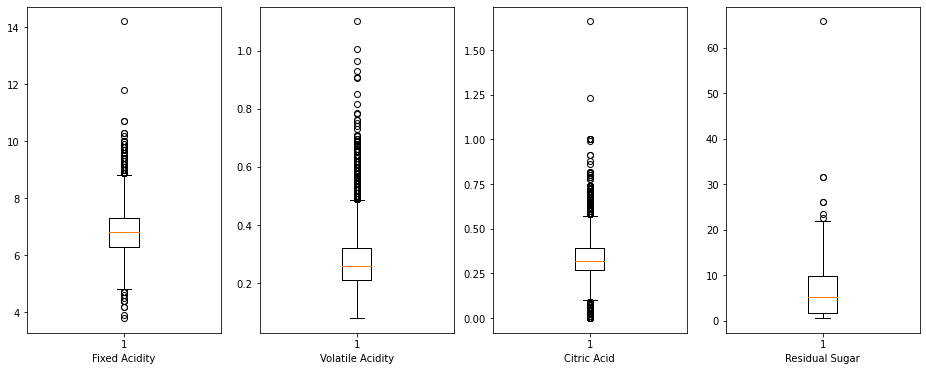

In [38]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=[16, 6])
ax1.boxplot(wineWhite['fixed acidity'])
ax1.set_xlabel('Fixed Acidity')
ax2.boxplot(wineWhite['volatile acidity'])
ax2.set_xlabel('Volatile Acidity')
ax3.boxplot(wineWhite['citric acid'])
ax3.set_xlabel('Citric Acid')
ax4.boxplot(wineWhite['residual sugar'])
ax4.set_xlabel('Residual Sugar')
plt.show()

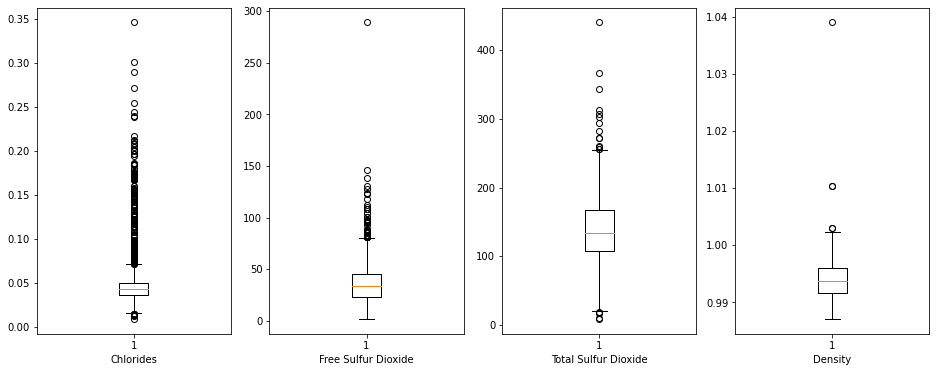

In [39]:
fig, (ax5,ax6, ax7, ax8) = plt.subplots(1, 4, figsize=[16, 6])
ax5.boxplot(wineWhite['chlorides'])
ax5.set_xlabel('Chlorides')
ax6.boxplot(wineWhite['free sulfur dioxide'])
ax6.set_xlabel('Free Sulfur Dioxide')
ax7.boxplot(wineWhite['total sulfur dioxide'])
ax7.set_xlabel('Total Sulfur Dioxide')
ax8.boxplot(wineWhite['density'])
ax8.set_xlabel('Density')
plt.show()

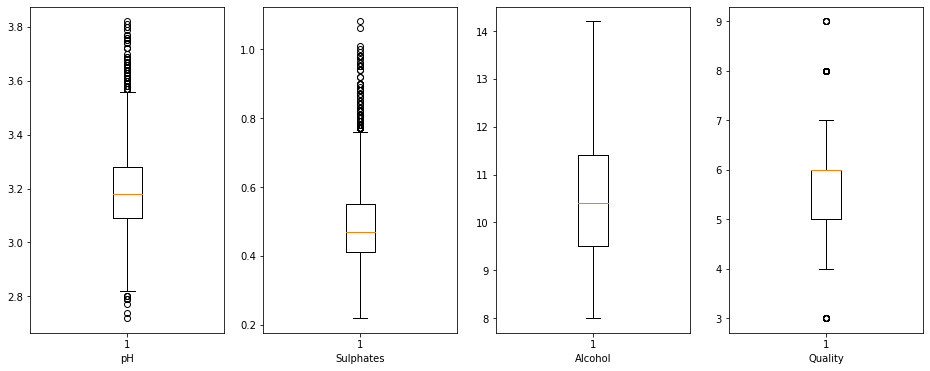

In [40]:
fig, (ax9,ax10, ax11, ax12) = plt.subplots(1, 4, figsize=[16, 6])
ax9.boxplot(wineWhite['pH'])
ax9.set_xlabel('pH')
ax10.boxplot(wineWhite['sulphates'])
ax10.set_xlabel('Sulphates')
ax11.boxplot(wineWhite['alcohol'])
ax11.set_xlabel('Alcohol')
ax12.boxplot(wineWhite['quality'])
ax12.set_xlabel('Quality')
plt.show()

#### Red Wine

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=[16, 6])
ax1.boxplot(wineRed['fixed acidity'])
ax1.set_xlabel('Fixed Acidity')
ax2.boxplot(wineRed['volatile acidity'])
ax2.set_xlabel('Volatile Acidity')
ax3.boxplot(wineRed['citric acid'])
ax3.set_xlabel('Citric Acid')
ax4.boxplot(wineRed['residual sugar'])
ax4.set_xlabel('Residual Sugar')
plt.show()

In [ ]:
fig, (ax5,ax6, ax7, ax8) = plt.subplots(1, 4, figsize=[16, 6])
ax5.boxplot(wineRed['chlorides'])
ax5.set_xlabel('Chlorides')
ax6.boxplot(wineRed['free sulfur dioxide'])
ax6.set_xlabel('Free Sulfur Dioxide')
ax7.boxplot(wineRed['total sulfur dioxide'])
ax7.set_xlabel('Total Sulfur Dioxide')
ax8.boxplot(wineRed['density'])
ax8.set_xlabel('Density')
plt.show()

In [ ]:
fig, (ax9,ax10, ax11, ax12) = plt.subplots(1, 4, figsize=[16, 6])
ax9.boxplot(wineRed['pH'])
ax9.set_xlabel('pH')
ax10.boxplot(wineRed['sulphates'])
ax10.set_xlabel('Sulphates')
ax11.boxplot(wineRed['alcohol'])
ax11.set_xlabel('Alcohol')
ax12.boxplot(wineRed['quality'])
ax12.set_xlabel('Quality')
plt.show()

### Histogram

#### White Wine

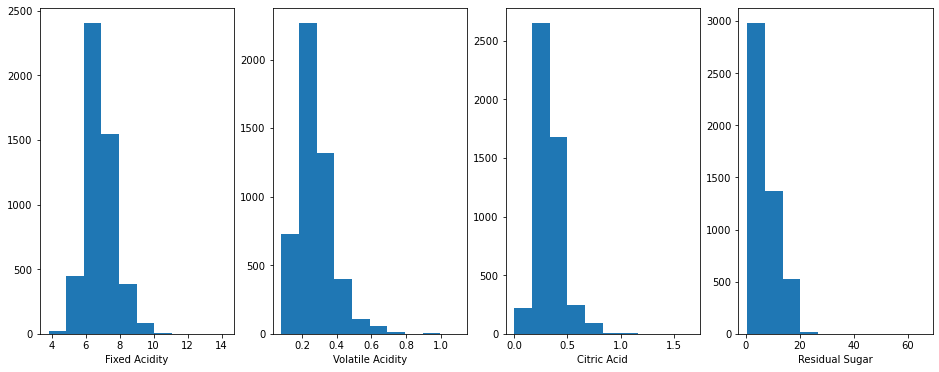

In [52]:
fig, (ax1,ax2, ax3, ax4) = plt.subplots(1, 4, figsize=[16, 6])
ax1.hist(wineWhite['fixed acidity'])
ax1.set_xlabel('Fixed Acidity')
ax2.hist(wineWhite['volatile acidity'])
ax2.set_xlabel('Volatile Acidity')
ax3.hist(wineWhite['citric acid'])
ax3.set_xlabel('Citric Acid')
ax4.hist(wineWhite['residual sugar'])
ax4.set_xlabel('Residual Sugar')
plt.show()

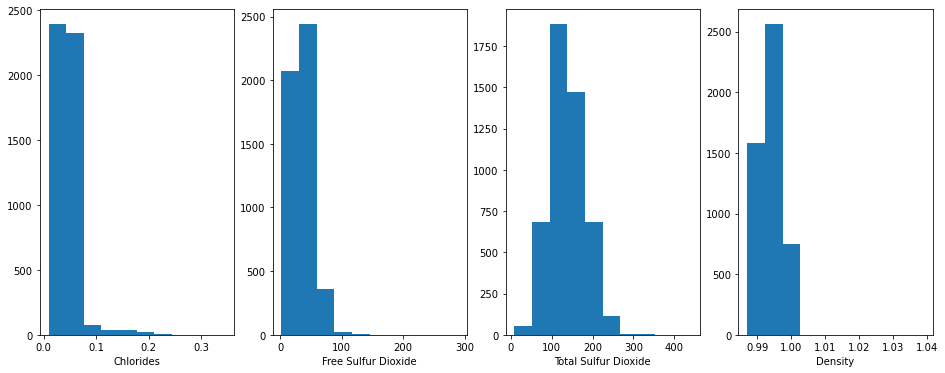

In [53]:
fig, (ax5,ax6, ax7, ax8) = plt.subplots(1, 4, figsize=[16, 6])
ax5.hist(wineWhite['chlorides'])
ax5.set_xlabel('Chlorides')
ax6.hist(wineWhite['free sulfur dioxide'])
ax6.set_xlabel('Free Sulfur Dioxide')
ax7.hist(wineWhite['total sulfur dioxide'])
ax7.set_xlabel('Total Sulfur Dioxide')
ax8.hist(wineWhite['density'])
ax8.set_xlabel('Density')
plt.show()

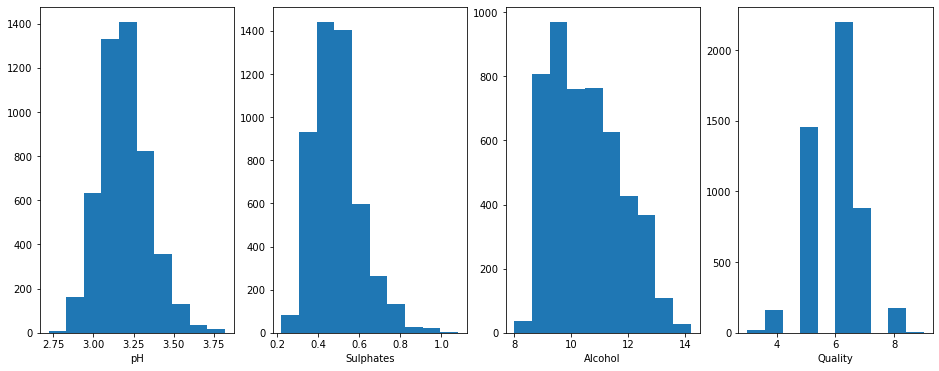

In [54]:
fig, (ax9,ax10, ax11, ax12) = plt.subplots(1, 4, figsize=[16, 6])
ax9.hist(wineWhite['pH'])
ax9.set_xlabel('pH')
ax10.hist(wineWhite['sulphates'])
ax10.set_xlabel('Sulphates')
ax11.hist(wineWhite['alcohol'])
ax11.set_xlabel('Alcohol')
ax12.hist(wineWhite['quality'])
ax12.set_xlabel('Quality')
plt.show()

#### Red Wine

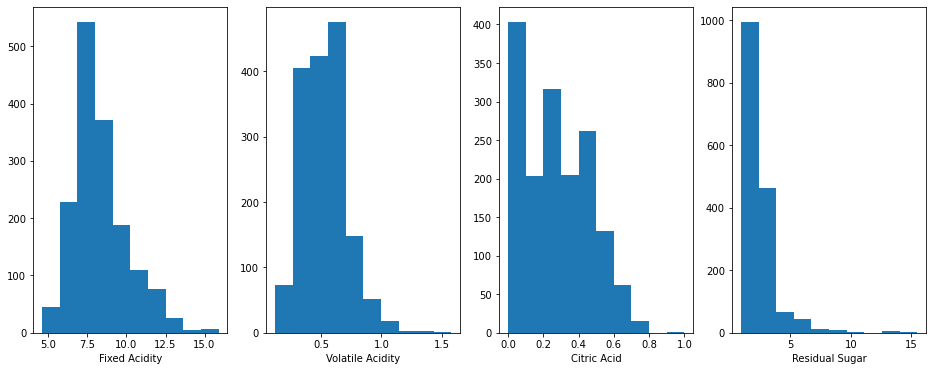

In [55]:
fig, (ax1,ax2, ax3, ax4) = plt.subplots(1, 4, figsize=[16, 6])
ax1.hist(wineRed['fixed acidity'])
ax1.set_xlabel('Fixed Acidity')
ax2.hist(wineRed['volatile acidity'])
ax2.set_xlabel('Volatile Acidity')
ax3.hist(wineRed['citric acid'])
ax3.set_xlabel('Citric Acid')
ax4.hist(wineRed['residual sugar'])
ax4.set_xlabel('Residual Sugar')
plt.show()

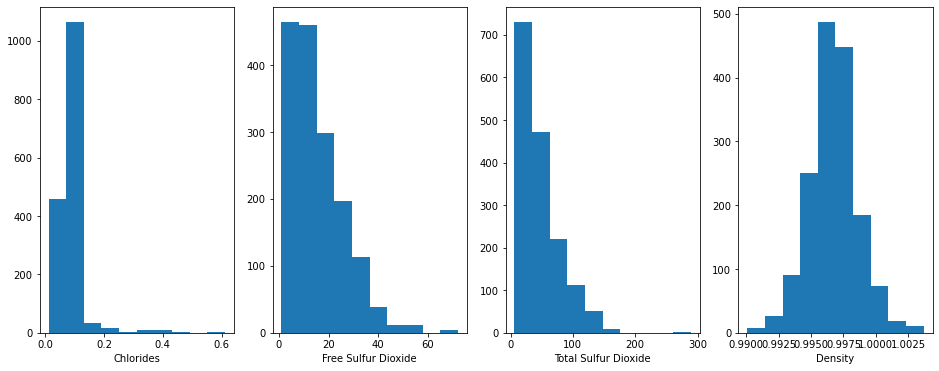

In [56]:
fig, (ax5,ax6, ax7, ax8) = plt.subplots(1, 4, figsize=[16, 6])
ax5.hist(wineRed['chlorides'])
ax5.set_xlabel('Chlorides')
ax6.hist(wineRed['free sulfur dioxide'])
ax6.set_xlabel('Free Sulfur Dioxide')
ax7.hist(wineRed['total sulfur dioxide'])
ax7.set_xlabel('Total Sulfur Dioxide')
ax8.hist(wineRed['density'])
ax8.set_xlabel('Density')
plt.show()

In [ ]:
fig, (ax9,ax10, ax11, ax12) = plt.subplots(1, 4, figsize=[16, 6])
ax9.hist(wineRed['pH'])
ax9.set_xlabel('pH')
ax10.hist(wineRed['sulphates'])
ax10.set_xlabel('Sulphates')
ax11.hist(wineRed['alcohol'])
ax11.set_xlabel('Alcohol')
ax12.hist(wineRed['quality'])
ax12.set_xlabel('Quality')
plt.show()

### EDA

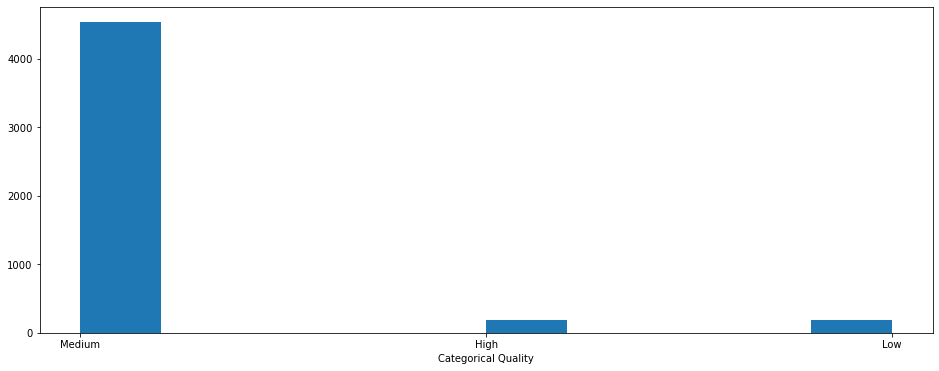

In [70]:
fig, ax13 = plt.subplots(1, 1, figsize=[16, 6])
ax13.hist(wineWhite['Categorical Quality'])
ax13.set_xlabel('Categorical Quality')
plt.show()

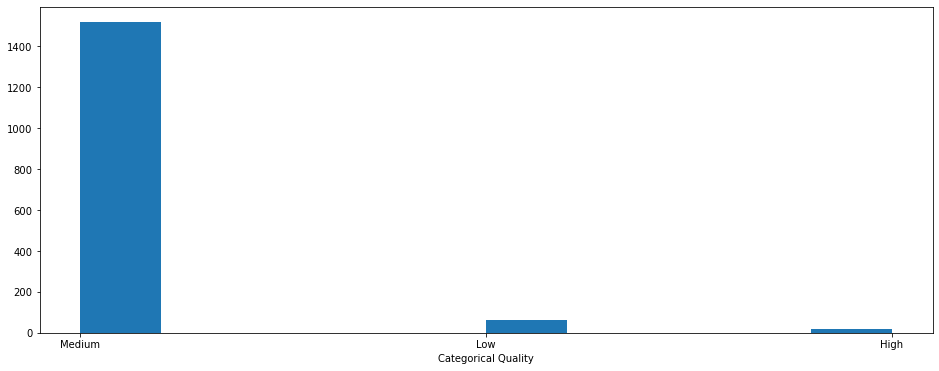

In [72]:
fig, ax13 = plt.subplots(1, 1, figsize=[16, 6])
ax13.hist(wineRed['Categorical Quality'])
ax13.set_xlabel('Categorical Quality')
plt.show()